In [275]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import numpy.random as npr
npr.seed(3)
from scipy.interpolate import interp1d
import pandas as pd
from scipy import stats
import scipy.special as special
%matplotlib inline
from scipy import linalg as la

1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-lieve of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

In [276]:
# defining the function that returns the probability 'p(t)'

half_lieve_Tl = 3.052 * 60     # half-life of thallium-208 expressed in seconds

time = round(half_lieve_Tl * 10)        # time window with the step of 1 second

Tl, Pb = 1000, 0  # initial number of thallium atoms and Lead atoms

# computing the probability of existing each thallium atom

TlPb_t = np.empty((time, 2))  

for t in range(time):
    for atom in range(Tl):
        if (np.random.random() < 1 - 2 ** (-1 / half_lieve_Tl)): # decay after 1 sec considering the the function of "p(t): 1-2**(-t/half_lieve_Tl)" for t = 1 s
            if (Tl > 0):
                Tl -= 1
                Pb += 1
    TlPb_t[t] = [Tl, Pb]  # number of thallium and lead atoms over time  
    
print(TlPb_t) 


[[ 997.    3.]
 [ 996.    4.]
 [ 990.   10.]
 ...
 [   0. 1000.]
 [   0. 1000.]
 [   0. 1000.]]


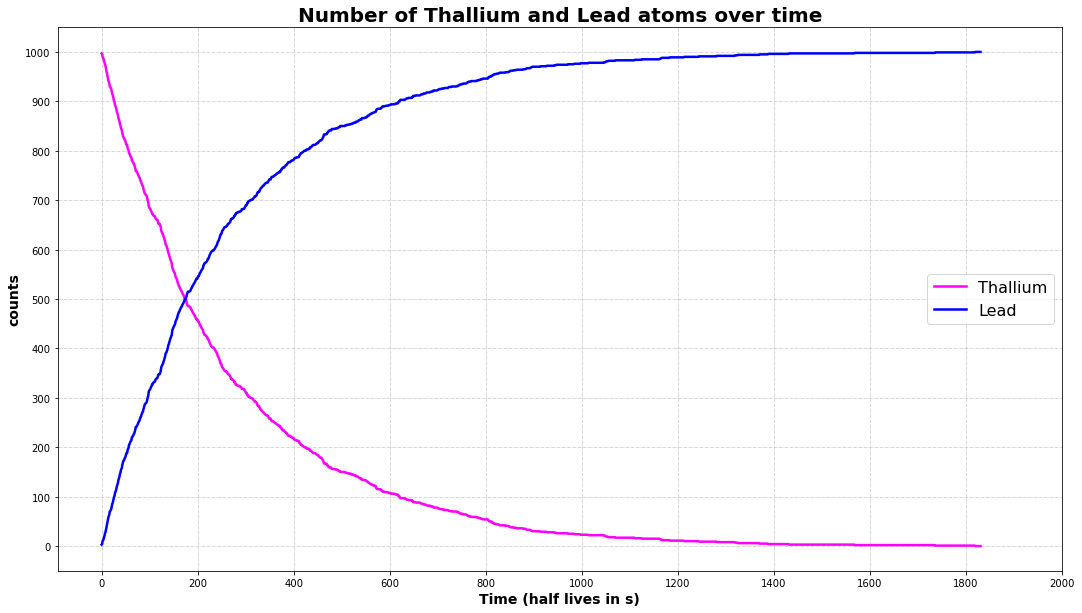

In [277]:
# plotting the number of atoms over time

fig, ax = plt.subplots(figsize = (18, 10))

x = np.arange(0, time, 1)
ax.plot(x, TlPb_t[:,0], color = 'magenta', label = 'Thallium', lw = 2.5)
ax.plot(x, TlPb_t[:,1], color = 'blue', label = 'Lead', lw = 2.5)
ax.set_title('Number of Thallium and Lead atoms over time', fontsize = 20, fontweight = 'bold')
ax.set_xlabel('Time (half lives in s)', fontsize = 14, fontweight = 'bold')
ax.set_ylabel('counts', fontsize = 14, fontweight = 'bold')

ax.set_xticks(range(0, 2000+1, round(2000/10)))
ax.set_yticks(range(0, 1000+1, round(1000/10)))

ax.legend(fontsize = 16)
ax.grid(linestyle = 'dashdot', linewidth = 0.5)

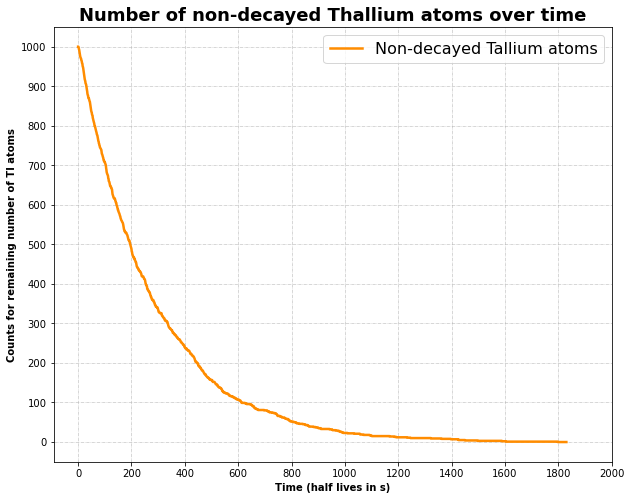

In [278]:
# defining the function that returns the decay time by using the inverse transformation method

def p(t): 
    return 2 ** (-t/half_lieve_Tl) * np.log2 / half_lieve_Tl

def f(p): 
    return tau*np.log2(1/(1-p))


# computing the decay times of the thallium atoms

z = np.random.random(1000)
decay_time = f(z)


# computing the number of non-decayed thallium atoms over time

non_decayed = [len(decay_time[decay_time>i]) for i in range(time)]

# plotting the number of atoms over time

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10, 8))
ax.plot(x, non_decayed, color = 'darkorange', label = 'Non-decayed Tallium atoms', lw = 2.5)
ax.set_title('Number of non-decayed Thallium atoms over time', fontsize = 18, fontweight = 'bold')
ax.set_xlabel('Time (half lives in s)', fontsize = 10, fontweight = 'bold')
ax.set_ylabel('Counts for remaining number of Tl atoms', fontsize = 10, fontweight = 'bold')

ax.set_xticks(range(0, 2000+1, round(2000/10)))
ax.set_yticks(range(0, 1000+1, round(1000/10)))

ax.legend(fontsize = 16)
ax.grid(linestyle = 'dashdot', linewidth = 0.5)

2\. **Rutherford Scattering**

The scattering angle $\theta$ of $\alpha$ particles hitting a positively charged nucleus of a Gold atom ($Z=79$) follows the rule:

$$
\tan{\frac{1}{2} \theta} = \frac{Z e^2} {2\pi \epsilon_0 E b}
$$

where $E=7.7$ MeV and $b$ beam is the impact parameter. The beam is represented by a 2D gaussian distribution with $\sigma=a_0/100$ for both coordinates ($a_0$ being the Bohr radius). Assume 1 million $\alpha$ particles are shot on the gold atom.

Computing the fraction of particles that "bounce back",i.e. those particle whose scattering angle is greater than $\pi/2$ (which set a condition on the impact parameter $b$)

In [279]:
# natuaral units

Z = 79
e = 1.602e-19
E = 7.7e6 * e  # energy of the beam (joules) 
epsilon0 = 8.854e-12
pi = np.pi
N = 10**6   # number of alpha particles
a0 = 5.292e-11
sigma = a0 / 100


# generating the impact parameters

x = np.random.normal(0, sigma, N)
y = np.random.normal(0, sigma, N)
b = np.sqrt(x**2 + y**2) # impact params


# defining the function that returns the scattering angle at a given impact parameter 'b'

def th_angle(x,y):
    return 2 * np.arctan((Z*e**2) / (2*pi*epsilon0*E*b))



# computing the corresponding scattering angles

scatter_angles = th_angle(x, y)


# computing the fraction of backscattered particles

accepted = scatter_angles[np.where(scatter_angles < pi/2)]
rejected = scatter_angles[np.where(scatter_angles >= pi/2)]

print('Fraction of forwardscattered particles: ', len(accepted)/N)
print('Fraction of backscattered particles:', len(rejected)/N)


Fraction of forwardscattered particles:  0.998433
Fraction of backscattered particles: 0.001567


3\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function 

$$f(x) =\sin^2{\frac{1}{x(2-x)}}$$

* Compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one

In [280]:
# defining the integrand function f(x)

def f(x):
    return (np.sin(1/(x*(2-x))))**2

xa = np.linspace(0,0.99999,10000)
xb = np.linspace(1.00001,2,1000)


<ipython-input-280-72c4d687d38b>:4: RuntimeWarning: divide by zero encountered in true_divide
  return (np.sin(1/(x*(2-x))))**2
<ipython-input-280-72c4d687d38b>:4: RuntimeWarning: invalid value encountered in sin
  return (np.sin(1/(x*(2-x))))**2
<ipython-input-280-72c4d687d38b>:4: RuntimeWarning: divide by zero encountered in true_divide
  return (np.sin(1/(x*(2-x))))**2
<ipython-input-280-72c4d687d38b>:4: RuntimeWarning: invalid value encountered in sin
  return (np.sin(1/(x*(2-x))))**2


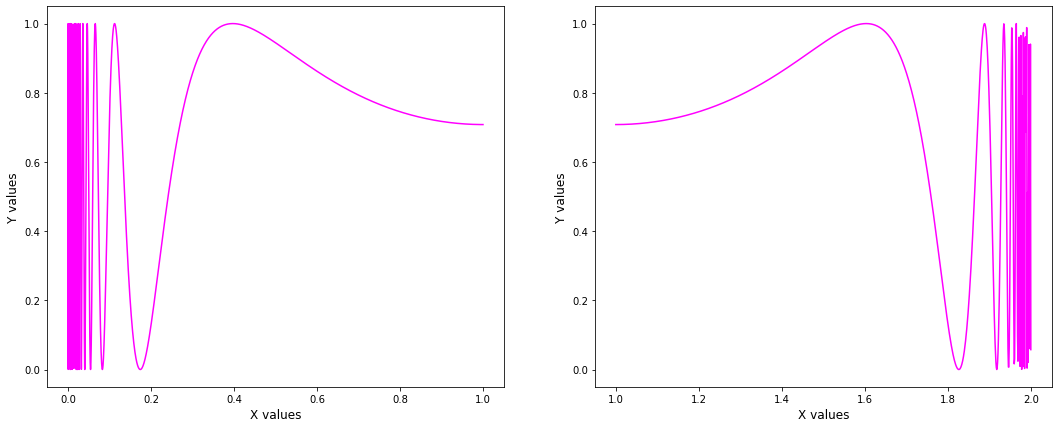

In [281]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (18, 7))
ax1.plot(xa, f(xa), color = 'magenta')
ax1.set_xlabel('X values', fontsize = 12)
ax1.set_ylabel('Y values', fontsize = 12)

ax2.plot(xb, f(xb), color = 'magenta')
ax2.set_xlabel('X values', fontsize = 12)
ax2.set_ylabel('Y values', fontsize = 12)

plt.show()

In [282]:
# setting the integration parameters

x_low, x_high = 0, 2   # extremes of integration
f_max = 1   # maximum value 
N = 10 ** 6   # number of sampls
R = 10 ** 2   # repetitions

A = (x_high - x_low)
f_sum = np.sum(f(x))

In [283]:
  # HIT/MISS METHOD
    
# defining the function
 
def hit_miss_func(f, x_low, x_high, f_max, N):
    return k * (A * f_max) / N


# computing the integral using this method

hit_miss_integral = [hit_miss_func(f, x_low, x_high, f_max, N) for i in range(R)]
hit_miss_mean = np.mean(hit_miss_integral)  
hit_miss_std = np.std(hit_miss_integral)   

print('\nThe integral value of f(x) between 0 and 2 using the hit-or-miss method:\n', hit_miss_mean)
print('\nError of this method is:', ' +-', hit_miss_std, '\n')


The integral value of f(x) between 0 and 2 using the hit-or-miss method:
 1.4504399999999995

Error of this method is:  +- 4.440892098500626e-16 



In [284]:
  # MEAN VALUE METHOD
    
# defining the function
    
def mean_value_func(f, x_low, x_high, N):
    return (A / N) * f_sum


# computing the integral using this method

mean_value_integral = [mean_value_func(f, x_low, x_high, N) for i in range(R)]   
mean_value_mean = np.mean(mean_value_integral)   
mean_value_std = np.std(mean_value_integral)   

print('\nThe integral value of f(x) between 0 and 2 using the hit-or-miss method:\n', mean_value_mean)
print('\nError of this method is:', ' +-', mean_value_std, '\n')


The integral value of f(x) between 0 and 2 using the hit-or-miss method:
 1.0022862303436824

Error of this method is:  +- 2.220446049250313e-16 



In [285]:
integral = [f(x) for i in range(R)]   
mean = np.mean(integral)   
std = np.std(integral)  

print('\nThe integral value of f(x) between 0 and 2 given by Mathematics:\n', mean)
print('\nError of this method is:', ' +-', std, '\n')
print('By comparing the two calculated values with the actual value of mathematics, it can be concluded that the method of the mean value is more accurate.' )


The integral value of f(x) between 0 and 2 given by Mathematics:
 0.5011431151718412

Error of this method is:  +- 0.3534272444488031 

By comparing the two calculated values with the actual value of mathematics, it can be concluded that the method of the mean value is more accurate.


4\. **Monte Carlo integration in high dimension**

* Start of by computing the area of a circle of unit radius, by integrating the function 

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere



In [286]:
# defining the function for computing the area of a nD sphere

N = 10 **3   # number of sampling points

def volum_func(N, dim, n_iter):    
    x_low, x_high = -1, 1   # extremes of integration for each dimension
    V = (x_high - x_low) ** dim   # volume of the integration space
    volum = []
    for i in range(n_iter):
        x = np.random.uniform(low = x_low, high = x_high, size = (N, dim))   # sampling points
        z = la.norm(x, axis=1) ** 2
        volum.append( V/N * len(z[z<1]))
    return [np.mean(volum), np.std(volum)]

circle = volum_func(10000, 2, 1000)
sphere_10D = volum_func(10000, 10, 1000)

# computing the area of the circle of unit radius
print('Area of the circle of unit radius is:', circle[0], circle[1])

# computing the volume of the 10D sphere of unit radius
print('\nVolume of the 10 D sphere of unit radius is:', sphere_10D[0], sphere_10D[1])


Area of the circle of unit radius is: 3.1416880000000003 0.016354686667741456

Volume of the 10 D sphere of unit radius is: 2.5292799999999995 0.5116517215450369


Text(0, 0.5, 'Y')

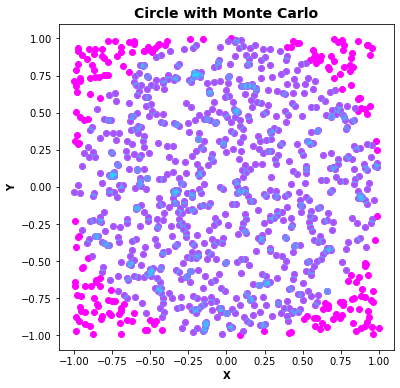

In [287]:
# Plotting the circle

x = np.random.uniform(-1, 1, (1000,2))
y = x[la.norm(x, axis=1) ** 2 < 1]

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (6, 6))

ax.scatter(x.T[0], x.T[1], color = 'magenta')
ax.scatter(y.T[0], y.T[1], alpha = 0.3, color = 'cyan')
ax.set_title('Circle with Monte Carlo', fontsize = 14, fontweight = 'bold')
ax.set_xlabel('X', fontweight = 'bold')
ax.set_ylabel('Y', fontweight = 'bold')


5\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should get a result about 0.84

In [288]:
# defining the integrand function

def f(x):
    return (x**(-0.5)) / (np.exp(x) + 1)


# defining the importance function

def w(x):
    return 1/np.sqrt(x)


# defining the function obtained using the inverse transformation method

def x(z):
    return z**2


# computing the integral  using the importance sampling method

N = 10 ** 6    # number of sampling points
U = np.random.random(N)   # sampling points from the uniform distribution 'u(z)'
W = x(U)  # samp ling points from the p.d.f. 'p(x)' associated with the importance function 'w(x)'
integral = 2 * addends.sum()  

print('Integral value of f(x) between 0 and 1, computed using the importance sampling method is:', integral)

Integral value of f(x) between 0 and 1, computed using the importance sampling method is: 0.8390247023341401
